In [11]:
from IPython.display import Image

# Challenge 1

* `AUTHOR_ID` - the ID of the author
* `LAST_NAME` - author last name
* `FIRST_NAME` - author first name
* `TITLE` - name of the published title
* `PUBLISHER` - name of the publisher where the title was published

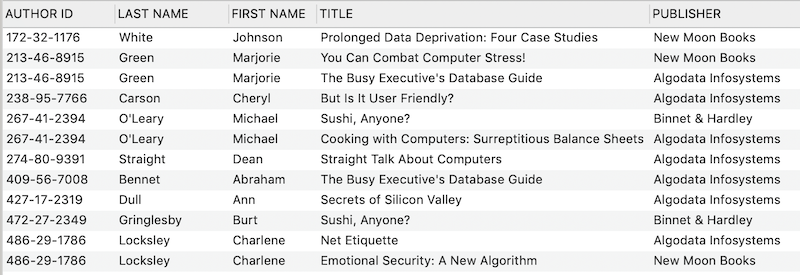

In [16]:
Image(filename='challenge-1.png')

## MY CODE

In [17]:
%load_ext sql

In [120]:
%sql sqlite:///publications.db

In [121]:
%%sql 
select * from sqlite_master

 * sqlite:///publications.db
Done.


type,name,tbl_name,rootpage,sql
table,authors,authors,2,"CREATE TABLE `authors` ( `au_id` varchar(11) NOT NULL, `au_lname` varchar(40) NOT NULL, `au_fname` varchar(20) NOT NULL, `phone` char(12) NOT NULL, `address` varchar(40) DEFAULT NULL, `city` varchar(20) DEFAULT NULL, `state` char(2) DEFAULT NULL, `zip` char(5) DEFAULT NULL, `contract` integer NOT NULL, PRIMARY KEY (`au_id`))"
index,sqlite_autoindex_authors_1,authors,3,None
table,discounts,discounts,4,"CREATE TABLE `discounts` ( `discounttype` varchar(40) NOT NULL, `stor_id` char(4) DEFAULT NULL, `lowqty` integer DEFAULT NULL, `highqty` integer DEFAULT NULL, `discount` decimal(4,2) NOT NULL, CONSTRAINT `discounts_ibfk_1` FOREIGN KEY (`stor_id`) REFERENCES `stores` (`stor_id`) ON DELETE CASCADE ON UPDATE CASCADE)"
table,employee,employee,5,"CREATE TABLE `employee` ( `emp_id` char(9) NOT NULL, `fname` varchar(20) NOT NULL, `minit` char(1) DEFAULT NULL, `lname` varchar(30) NOT NULL, `job_id` integer NOT NULL, `job_lvl` integer DEFAULT NULL, `pub_id` char(4) NOT NULL, `hire_date` datetime NOT NULL, PRIMARY KEY (`emp_id`), CONSTRAINT `employee_ibfk_1` FOREIGN KEY (`job_id`) REFERENCES `jobs` (`job_id`) ON DELETE CASCADE ON UPDATE CASCADE, CONSTRAINT `employee_ibfk_2` FOREIGN KEY (`pub_id`) REFERENCES `publishers` (`pub_id`) ON DELETE CASCADE ON UPDATE CASCADE)"
index,sqlite_autoindex_employee_1,employee,6,None
table,jobs,jobs,7,"CREATE TABLE `jobs` ( `job_id` integer NOT NULL, `job_desc` varchar(50) NOT NULL, `min_lvl` integer NOT NULL, `max_lvl` integer NOT NULL, PRIMARY KEY (`job_id`))"
table,pub_info,pub_info,8,"CREATE TABLE `pub_info` ( `pub_id` char(4) NOT NULL, `logo` longblob DEFAULT NULL, `pr_info` longtext DEFAULT NULL, PRIMARY KEY (`pub_id`), CONSTRAINT `pub_info_ibfk_1` FOREIGN KEY (`pub_id`) REFERENCES `publishers` (`pub_id`) ON DELETE CASCADE ON UPDATE CASCADE)"
index,sqlite_autoindex_pub_info_1,pub_info,9,None
table,publishers,publishers,34,"CREATE TABLE `publishers` ( `pub_id` char(4) NOT NULL, `pub_name` varchar(40) DEFAULT NULL, `city` varchar(20) DEFAULT NULL, `state` char(2) DEFAULT NULL, `country` varchar(30) DEFAULT NULL, PRIMARY KEY (`pub_id`))"
index,sqlite_autoindex_publishers_1,publishers,35,None


In [61]:
%%sql 
create view Authors_info as
select titleauthor.au_id as AUTHOR_ID, au_lname as LAST_NAME,  au_fname as FIRST_NAME, titles.title as TITLE, publishers.pub_name as PUBLISHER
from authors 
join titleauthor 
on authors.au_id=titleauthor.au_id
join titles 
on titleauthor.title_id=titles.title_id
join publishers 
on publishers.pub_id=titles.pub_id

 * sqlite:///publications.db
(sqlite3.OperationalError) table Authors_info already exists
[SQL: create view Authors_info as
select titleauthor.au_id as AUTHOR_ID, au_lname as LAST_NAME,  au_fname as FIRST_NAME, titles.title as TITLE, publishers.pub_name as PUBLISHER
from authors 
join titleauthor 
on authors.au_id=titleauthor.au_id
join titles 
on titleauthor.title_id=titles.title_id
join publishers 
on publishers.pub_id=titles.pub_id]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [62]:
%%sql
select * 
from Authors_info

 * sqlite:///publications.db
Done.


AUTHOR_ID,LAST_NAME,FIRST_NAME,TITLE,PUBLISHER
172-32-1176,White,Johnson,Prolonged Data Deprivation: Four Case Studies,New Moon Books
213-46-8915,Green,Marjorie,The Busy Executive's Database Guide,Algodata Infosystems
213-46-8915,Green,Marjorie,You Can Combat Computer Stress!,New Moon Books
238-95-7766,Carson,Cheryl,But Is It User Friendly?,Algodata Infosystems
267-41-2394,O'Leary,Michael,Cooking with Computers: Surreptitious Balance Sheets,Algodata Infosystems
267-41-2394,O'Leary,Michael,"Sushi, Anyone?",Binnet & Hardley
274-80-9391,Straight,Dean,Straight Talk About Computers,Algodata Infosystems
409-56-7008,Bennet,Abraham,The Busy Executive's Database Guide,Algodata Infosystems
427-17-2319,Dull,Ann,Secrets of Silicon Valley,Algodata Infosystems
472-27-2349,Gringlesby,Burt,"Sushi, Anyone?",Binnet & Hardley


In [63]:
%%sql 
select count(*)
from titleauthor

 * sqlite:///publications.db
Done.


count(*)
25


In [64]:
%%sql
select count (*)
from Authors_info

 * sqlite:///publications.db
Done.


count (*)
25


_IT WORKED!_

# Challenge 2

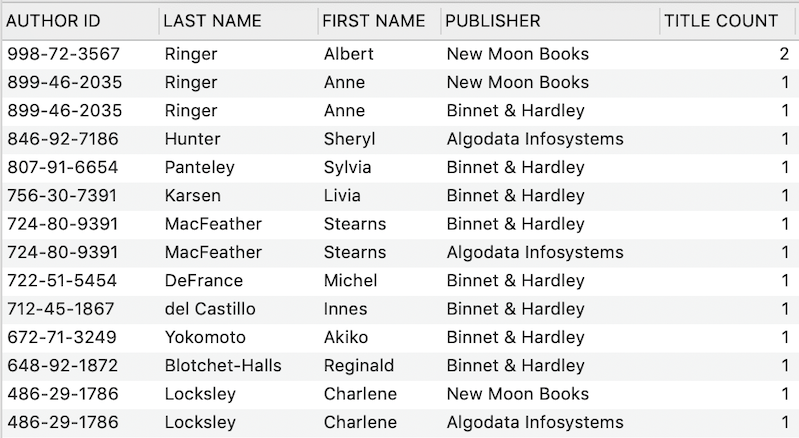

In [65]:
Image(filename='challenge-2.png')

In [71]:
%%sql
create view Authorst as
select AUTHOR_ID, LAST_NAME, FIRST_NAME, PUBLISHER, count(*) TITLE
from Authors_info
group by AUTHOR_ID, PUBLISHER
order by (AUTHOR_ID) desc

 * sqlite:///publications.db
Done.


[]

In [74]:
%%sql
select sum(TITLE) 
from Authorst

 * sqlite:///publications.db
Done.


sum(TITLE)
25


_IT'S CORRECT!_

# Challenge 3

In [75]:
%%sql
select AUTHOR_ID,LAST_NAME, FIRST_NAME
from Authors_info
join AUTHOR_ID
on 

 * sqlite:///publications.db
Done.


AUTHOR_ID,LAST_NAME,FIRST_NAME
172-32-1176,White,Johnson
213-46-8915,Green,Marjorie
213-46-8915,Green,Marjorie
238-95-7766,Carson,Cheryl
267-41-2394,O'Leary,Michael
267-41-2394,O'Leary,Michael
274-80-9391,Straight,Dean
409-56-7008,Bennet,Abraham
427-17-2319,Dull,Ann
472-27-2349,Gringlesby,Burt


In [78]:
%%sql
select *
from sales

 * sqlite:///publications.db
Done.


stor_id,ord_num,ord_date,qty,payterms,title_id
6380,6871,1994-09-14 00:00:00,5,Net 60,BU1032
6380,722a,1994-09-13 00:00:00,3,Net 60,PS2091
7066,A2976,1993-05-24 00:00:00,50,Net 30,PC8888
7066,QA7442.3,1994-09-13 00:00:00,75,ON invoice,PS2091
7067,D4482,1994-09-14 00:00:00,10,Net 60,PS2091
7067,P2121,1992-06-15 00:00:00,40,Net 30,TC3218
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC4203
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC7777
7131,N914008,1994-09-14 00:00:00,20,Net 30,PS2091
7131,N914014,1994-09-14 00:00:00,25,Net 30,MC3021


In [91]:
%%sql 
select titleauthor.au_id as AUTHOR_ID, au_lname as LAST_NAME,  au_fname as FIRST_NAME, sum (sales.qty) as TOTAL
from authors 
join titleauthor 
on authors.au_id=titleauthor.au_id
join sales 
on titleauthor.title_id=sales.title_id
group by AUTHOR_ID
order by TOTAL desc
limit (3)

 * sqlite:///publications.db
Done.


AUTHOR_ID,LAST_NAME,FIRST_NAME,TOTAL
899-46-2035,Ringer,Anne,148
998-72-3567,Ringer,Albert,133
213-46-8915,Green,Marjorie,50


# Challenge 4

In [122]:
%%sql 
select titleauthor.au_id as AUTHOR_ID, au_lname as LAST_NAME,  au_fname as FIRST_NAME, sum (sales.qty) as TOTAL

from authors 

join titleauthor 
on authors.au_id=titleauthor.au_id
left join sales 
on titleauthor.title_id=sales.title_id
group by AUTHOR_ID
order by TOTAL desc

 * sqlite:///publications.db
Done.


AUTHOR_ID,LAST_NAME,FIRST_NAME,TOTAL
899-46-2035,Ringer,Anne,148
998-72-3567,Ringer,Albert,133
213-46-8915,Green,Marjorie,50
427-17-2319,Dull,Ann,50
846-92-7186,Hunter,Sheryl,50
267-41-2394,O'Leary,Michael,45
724-80-9391,MacFeather,Stearns,45
722-51-5454,DeFrance,Michel,40
807-91-6654,Panteley,Sylvia,40
238-95-7766,Carson,Cheryl,30


In [163]:
%%sql 
create view Authors_Sl as 
select authors.au_id as AUTHOR_ID, au_lname as LAST_NAME,  au_fname as FIRST_NAME , titleauthor.title_id as TITLE_ID

from authors 

left join titleauthor 
on authors.au_id=titleauthor.au_id

group by AUTHOR_ID

 * sqlite:///publications.db
Done.


[]

In [169]:
%%sql
select *
from Authors_Sl

 * sqlite:///publications.db
Done.


AUTHOR_ID,LAST_NAME,FIRST_NAME,TITLE_ID
172-32-1176,White,Johnson,PS3333
213-46-8915,Green,Marjorie,BU1032
238-95-7766,Carson,Cheryl,PC1035
267-41-2394,O'Leary,Michael,BU1111
274-80-9391,Straight,Dean,BU7832
341-22-1782,Smith,Meander,None
409-56-7008,Bennet,Abraham,BU1032
427-17-2319,Dull,Ann,PC8888
472-27-2349,Gringlesby,Burt,TC7777
486-29-1786,Locksley,Charlene,PC9999


In [179]:
%%sql
select AUTHOR_ID,LAST_NAME, FIRST_NAME, ifnull(sum(sales.qty),0) as TOTAL
from Authors_Sl

left join sales 
on Authors_Sl.TITLE_ID=sales.title_id

group by AUTHOR_ID
order by TOTAL desc

 * sqlite:///publications.db
Done.


AUTHOR_ID,LAST_NAME,FIRST_NAME,TOTAL
998-72-3567,Ringer,Albert,108
846-92-7186,Hunter,Sheryl,50
427-17-2319,Dull,Ann,50
899-46-2035,Ringer,Anne,40
807-91-6654,Panteley,Sylvia,40
722-51-5454,DeFrance,Michel,40
238-95-7766,Carson,Cheryl,30
724-80-9391,MacFeather,Stearns,25
267-41-2394,O'Leary,Michael,25
756-30-7391,Karsen,Livia,20
